# FIT5149 Assessment 1 : Mining Knowledge from Data
#### Student Name: Md. Saadman Hossain
#### Student ID: 31043313






Libraries used:

    library(psych)
    library(ISLR)
    library(ggplot2)
    library(GGally)
    library(gridExtra)
    library(cowplot)
    library(lattice)
    library(dplyr)
    library(ggpubr)
    library(randomForest)
    library(Metrics)
    library(yardstick)
    library(car)





## Importing required libraries

In [1]:
library(psych)
library(ISLR)
library(ggplot2)
library(GGally)
library(gridExtra)
library(cowplot)
library(lattice)
library(dplyr)
library(ggpubr)
library(randomForest)
library(Metrics)
library(yardstick)
library(car)

Warning message:
"package 'psych' was built under R version 4.0.2"
Warning message:
"package 'ISLR' was built under R version 4.0.2"
Warning message:
"package 'ggplot2' was built under R version 4.0.2"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"package 'GGally' was built under R version 4.0.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'gridExtra' was built under R version 4.0.2"
Warning message:
"package 'cowplot' was built under R version 4.0.2"
Warning message:
"package 'lattice' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggpubr' was built under R version 4

## Reading the train data

In [2]:
data = read.csv('train.csv', header = TRUE)

In [3]:
dim(data) #dimension if the data

[1] 7008   14

In [4]:
head(data)

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,13/03/2018,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2,15/03/2018,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
3,29/11/2018,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4,4/04/2018,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
5,15/02/2018,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
6,20/04/2018,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


## Changing Hour, Seasons, Holiday, Functioning.Day to factor as they are categorical variables

### Here the hour attribute is the hour of the day, and i think hour of the day affects the number of bikes rented considerably. turning it into a categorical variable is justifiable in this scenario. Season, Holiday and Functioning.Day also need to be converted to factor for further analysis and exploration. 


In [5]:
# changing Hour, Seasons, Holiday, Functioning.Day to factor as they are categorical variables

data$Seasons <- as.factor(data$Seasons) 
data$Holiday <- as.factor(data$Holiday) 
data$Functioning.Day <- as.factor(data$Functioning.Day) 
data$Hour <- as.factor(data$Hour) 

In [6]:
head(data)

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<chr>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,13/03/2018,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2,15/03/2018,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
3,29/11/2018,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4,4/04/2018,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
5,15/02/2018,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
6,20/04/2018,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


## Changing a few attribute names

#### Rented.Bike.Count = BikeCount
#### Temperature = Temp
#### Dew.point.temperature = DPtemp
#### Solar.Radiation = SR
#### Functioning.Day = Fday

In [7]:
names(data)[c(2,4,8,9,14)]<-c("BikeCount","Temp","DPtemp", "SR","Fday")
head(data)

,Date,BikeCount,Hour,Temp,Humidity,Wind.speed,Visibility,DPtemp,SR,Rainfall,Snowfall,Seasons,Holiday,Fday
,<chr>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,13/03/2018,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2,15/03/2018,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
3,29/11/2018,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4,4/04/2018,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
5,15/02/2018,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
6,20/04/2018,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


## Adding a day of the week, months variable and converting them to factor

In [8]:
## Day of the Week
data$Date = substr(data$Date,1,10)
days<-weekdays(as.Date(data$Date))
data$days=days
data$days <- factor(data$days, levels=c("Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))

In [9]:
## Converting date to a date format in R
data$Date <- as.POSIXct(data$Date)
## Extracting Month Name
data$months <- format(data$Date,"%B")
data$months <- factor(data$months, levels=c("January","February", "March",
                                            "April", "May", "June","July", "August",
                                            "September", "October", "November", "December"))

In [10]:
head(data)

,Date,BikeCount,Hour,Temp,Humidity,Wind.speed,Visibility,DPtemp,SR,Rainfall,Snowfall,Seasons,Holiday,Fday,days,months
,<dttm>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0013-03-20,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes,Wednesday,March
2,0015-03-20,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes,Friday,March
3,0029-11-20,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes,Tuesday,November
4,0004-04-20,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes,Tuesday,April
5,0015-02-20,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes,Friday,February
6,0020-04-20,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes,Monday,April


## Here i am generating histograms for the numeric attributes to analyse their distribution

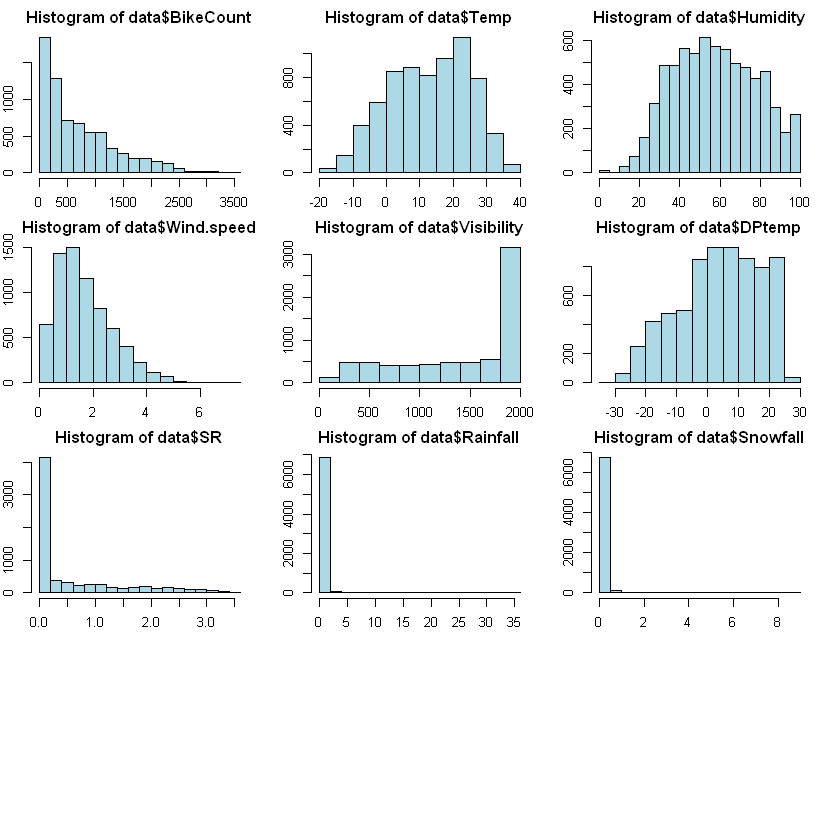

In [11]:
par(mfrow=c(4,3))
par(mar = rep(2, 4))
hist(data$BikeCount, col = 'lightblue')
hist(data$Temp, col = 'lightblue')
hist(data$Humidity, col = 'lightblue')
hist(data$Wind.speed, col = 'lightblue')
hist(data$Visibility, col = 'lightblue')
hist(data$DPtemp, col = 'lightblue')
hist(data$SR, col = 'lightblue')
hist(data$Rainfall, col = 'lightblue')
hist(data$Snowfall, col = 'lightblue')


# Inference:

     1.We can observe that BikeCount (response) attribute is skewed to the left. infact most of the numerical attributed other than Temp and Humidity are skewed. skewed data suggests that there will be outliers in the data, thus a log transformation for certain variables might be an option for modelling purposes.

     2.Temp and humidity seems to be close to normal in distribution

     3.Most of the data for solar radiation, rainfall and snowfall seems to be leaning towards zero, suggesting the lack of these attributes affecting the metropolitan area.

     4.The data for visibility is also highly skewed to the right, which usually means suitable condition for bike riders.

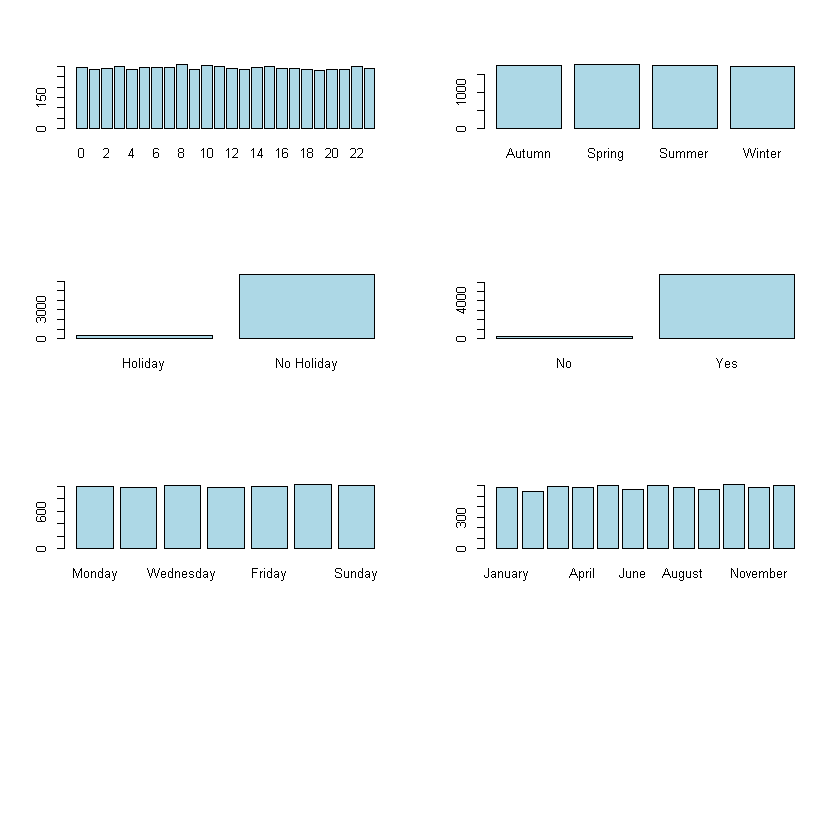

In [12]:
# visualising the categorical variables

par(mfrow=c(4,2))
barplot(table(data$Hour), col = 'lightblue')

barplot(table(data$Seasons), col = 'lightblue')
barplot(table(data$Holiday), col = 'lightblue')
barplot(table(data$Fday), col = 'lightblue')
barplot(table(data$days), col = 'lightblue')
barplot(table(data$months), col = 'lightblue')




# inference

1.  we can see here that there are four seasons which are almost equally distributed.
2. functioning day has way more on yes, holiday has way more on no holiday.
3. day of the week and month also seem to be approximately equally distributed.

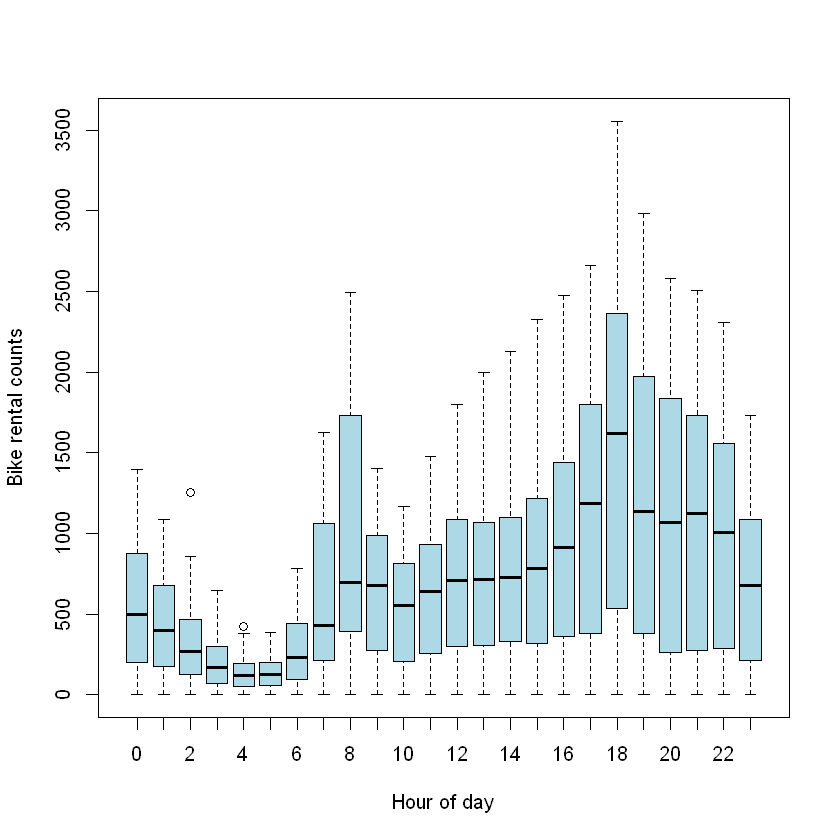

In [13]:
# distributions of users for each hour in the day


boxplot(data$BikeCount~data$Hour,xlab="Hour of day", ylab="Bike rental counts", col = 'lightblue')

#inference

# fairly low avg bike counts from 0-7 hours, moderate from 8-16, 17-22 high peaking at 18, 

# Inference

     fairly low avg bike counts from 0-7 hours (till 7 am), moderate from 8-16 (8 am to 4pm), 17-22 (5pm to 10 pm) high and peaking at 18 (6pm). This makes sense as around 8 am people start heading off to work/study and at around 6 pm they are heading home. highlights the 9-5 workday for regular people.

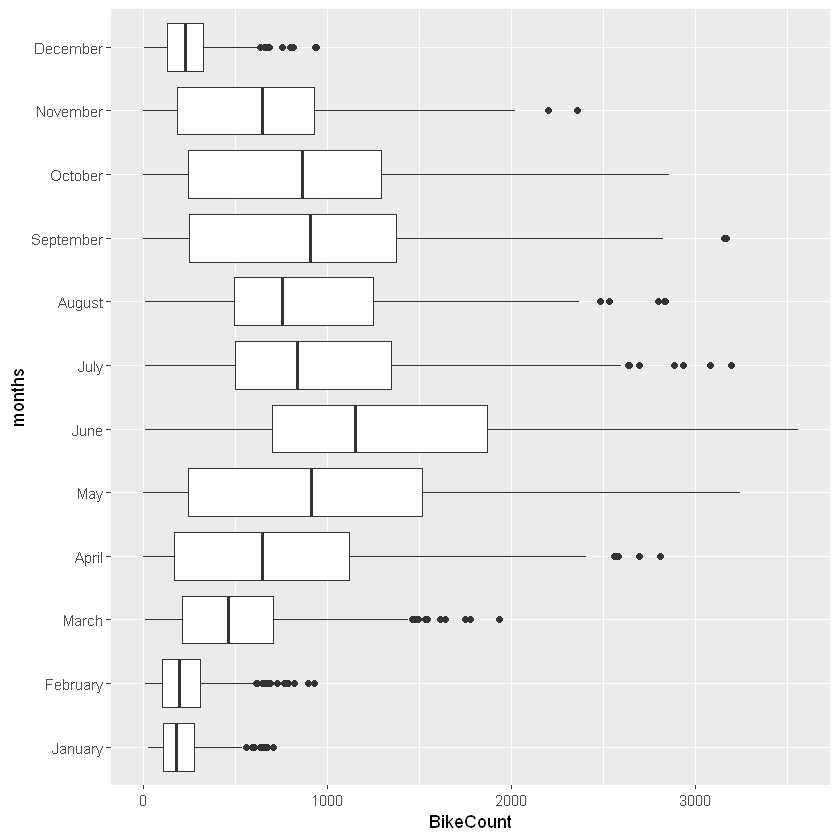

In [14]:
# using ggplot2 for boxplots of bike rentals over the 12 months.

ggplot(data, aes(BikeCount, months)) + geom_boxplot()

# considerable variation for each month indicating it will have effect on response variable

# Inference

    1.very low average bikecounts for the months of december,january and february. This probably happens due to holiday season.
    2.Highest average is the month of june
    3.we can observe as months passes, average bike counts increases. it peaks at june, then slowly starts decreasing
    

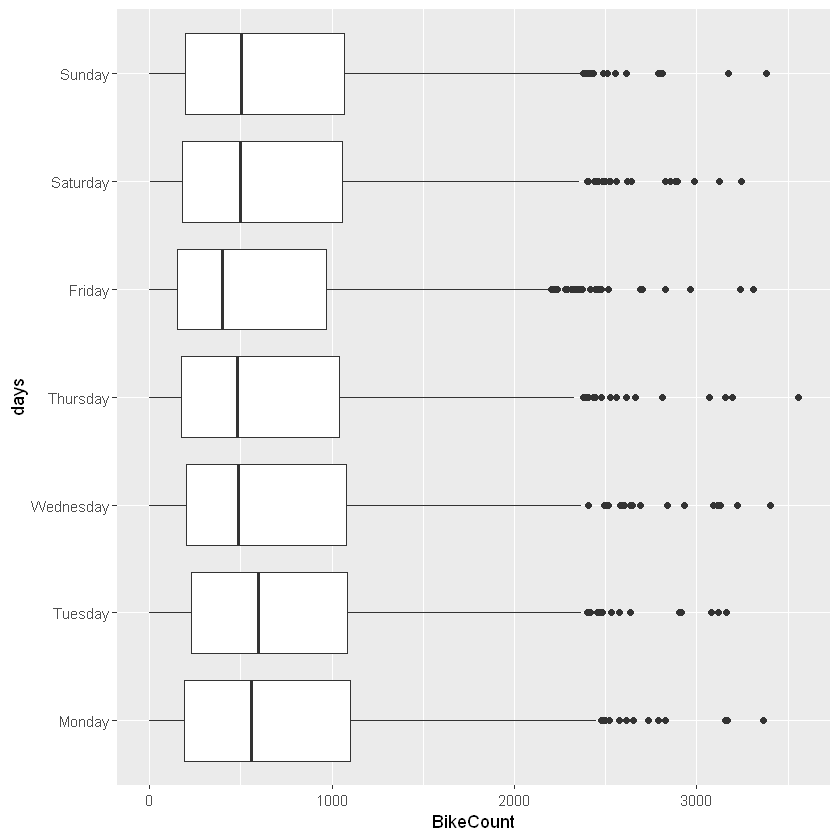

In [15]:
#boxplot(data$BikeCount~data$days,xlab="Days", ylab="Bike rental counts", col = 'lightblue')

ggplot(data, aes(BikeCount, days)) + geom_boxplot()



### not much variation in the data, probably means that it wont affect the demand for bike rentals as much. only small variation is noticed for friday with slightly less numbers on average.

In [16]:
head(data)

,Date,BikeCount,Hour,Temp,Humidity,Wind.speed,Visibility,DPtemp,SR,Rainfall,Snowfall,Seasons,Holiday,Fday,days,months
,<dttm>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0013-03-20,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes,Wednesday,March
2,0015-03-20,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes,Friday,March
3,0029-11-20,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes,Tuesday,November
4,0004-04-20,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes,Tuesday,April
5,0015-02-20,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes,Friday,February
6,0020-04-20,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes,Monday,April


# creating a correlation matrix

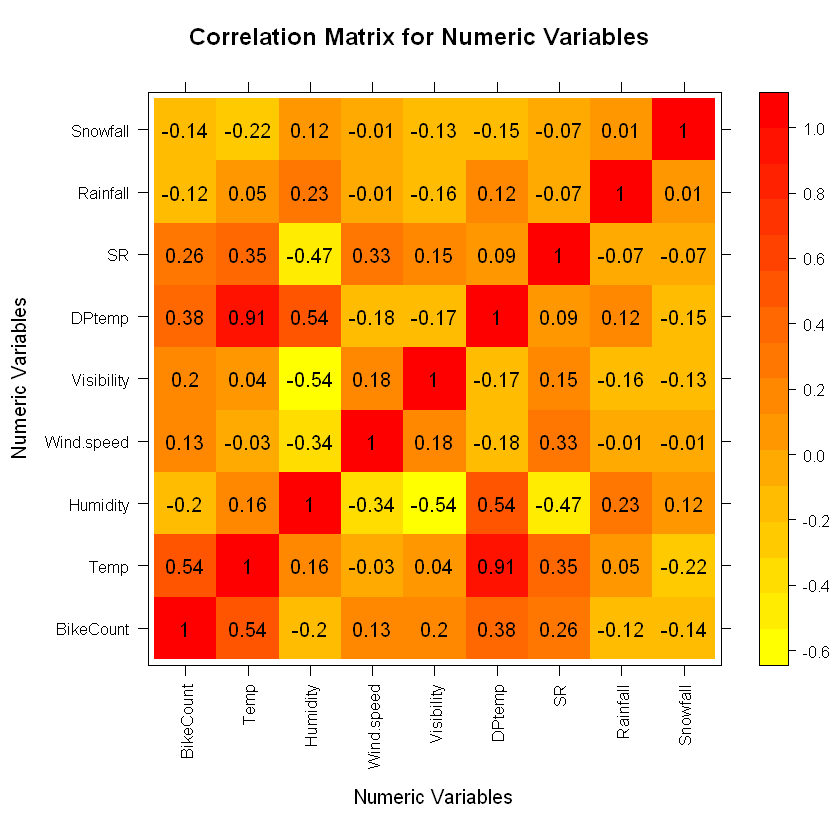

In [17]:
# creating a correlation matrix
Panel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color scheme
cols = colorRampPalette(c("Yellow","Red"))
#Plot the correlation matrix.
levelplot(round(cor(data[c(2, 4:11)]),3), col.regions = cols(100), main = "Correlation Matrix for Numeric Variables",
          xlab = 'Numeric Variables', ylab = 'Numeric Variables', 
          scales = list(x = list(rot = 90)), panel = Panel)

# inference


     1.High correlation between temp and dptemp attributes. 
     2.Temp, dptemp, sr positive correlation with response variable BikeCount.
     3.Humidity, rainfall, snowfall, negative correlation with response variable BikeCount.
     4.Windspeed not very correlated with response variable BikeCount.
     5.Humidity has moderate negative correlation with windspeed, visibility and solar radiation.

# Getting the structure of the data

In [18]:
str(data)

'data.frame':	7008 obs. of  16 variables:
 $ Date      : POSIXct, format: "0013-03-20" "0015-03-20" ...
 $ BikeCount : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour      : Factor w/ 24 levels "0","1","2","3",..: 15 15 6 10 18 11 9 2 21 19 ...
 $ Temp      : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity  : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed: num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility: int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ DPtemp    : num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ SR        : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall  : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons   : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...
 $ Holiday   : Factor w/ 2 levels "Holiday","No Holiday": 2 2 2 2 1 2 2 2 2 2 ...
 $ Fday      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ days      : Factor w/ 7 levels "

In [19]:
# descriptive stats

summary(data)



      Date                       BikeCount           Hour           Temp       
 Min.   :0001-01-20 00:00:00   Min.   :   0.0   8      : 307   Min.   :-17.50  
 1st Qu.:0008-10-20 00:00:00   1st Qu.: 188.0   10     : 303   1st Qu.:  3.40  
 Median :0016-03-20 00:00:00   Median : 503.0   22     : 301   Median : 13.60  
 Mean   :0016-04-14 12:43:59   Mean   : 703.2   15     : 300   Mean   : 12.83  
 3rd Qu.:0023-10-20 00:00:00   3rd Qu.:1063.0   3      : 299   3rd Qu.: 22.50  
 Max.   :0031-12-20 00:00:00   Max.   :3556.0   11     : 298   Max.   : 39.40  
                                                (Other):5200                   
    Humidity       Wind.speed     Visibility         DPtemp       
 Min.   : 0.00   Min.   :0.00   Min.   :  27.0   Min.   :-30.600  
 1st Qu.:42.00   1st Qu.:0.90   1st Qu.: 944.8   1st Qu.: -4.700  
 Median :57.00   Median :1.50   Median :1693.0   Median :  5.000  
 Mean   :58.25   Mean   :1.72   Mean   :1436.0   Mean   :  4.029  
 3rd Qu.:74.00   3rd Qu.:

# Generate observations from summary stats


    Huge range for bike count, might indicate count varies through different hours
    Data spread equally for all seasons
    Huge range for snowfall, rain fall, solar radiation


In [20]:
#using psych describe function
round(describe(data), 4)

Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"
Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date,1,7008,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
BikeCount,2,7008,703.1507,645.8736,503.00,610.7701,557.4576,0.0,3556.00,3556.00,1.1377,0.7530,7.7153
Hour*,3,7008,12.4572,6.9070,12.00,12.4451,8.8956,1.0,24.00,23.00,0.0137,-1.1950,0.0825
Temp,4,7008,12.8325,11.9399,13.60,13.1351,13.9364,-17.5,39.40,56.90,-0.1921,-0.8544,0.1426
Humidity,5,7008,58.2481,20.3581,57.00,58.0590,23.7216,0.0,98.00,98.00,0.0517,-0.8070,0.2432
Wind.speed,6,7008,1.7198,1.0334,1.50,1.6234,1.0378,0.0,7.40,7.40,0.8927,0.7234,0.0123
Visibility,7,7008,1435.9805,608.6228,1693.00,1508.5747,455.1582,27.0,2000.00,1973.00,-0.7041,-0.9555,7.2703
DPtemp,8,7008,4.0292,13.0471,5.00,4.7072,14.5295,-30.6,26.80,57.40,-0.3630,-0.7622,0.1559
SR,9,7008,0.5711,0.8719,0.01,0.3858,0.0148,0.0,3.52,3.52,1.4994,1.0998,0.0104


## atrributes with high skewness has high standard deviation. only temp and humidity seems to be close to normal distributions, other numeric variables are skewed to either left or right. this indicates volatality in the data.

# Firstly i am attempting to fit the data with a multiple linear regression model with all the variables except Date

In [21]:
model1 = lm(BikeCount~.-Date, data = data)
summary(model1)


Call:
lm(formula = BikeCount ~ . - Date, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1668.65  -213.23    -4.47   196.58  1531.54 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -63.71402   95.08693  -0.670 0.502841    
Hour1             -106.82904   29.61777  -3.607 0.000312 ***
Hour2             -222.11845   29.55004  -7.517 6.32e-14 ***
Hour3             -290.04228   29.38507  -9.870  < 2e-16 ***
Hour4             -351.57221   29.71084 -11.833  < 2e-16 ***
Hour5             -333.02794   29.55221 -11.269  < 2e-16 ***
Hour6             -174.06984   29.65230  -5.870 4.55e-09 ***
Hour7              128.99559   29.56310   4.363 1.30e-05 ***
Hour8              470.93484   29.49477  15.967  < 2e-16 ***
Hour9               35.63497   30.60406   1.164 0.244307    
Hour10            -199.92190   31.46496  -6.354 2.23e-10 ***
Hour11            -213.91064   32.77627  -6.526 7.21e

## We can see that the adjusted R squared is 0.6956, which means that the model is only able to expain only 66 percent of the data. The model needs improvment

# Fit a multiple regression model to predict bikecount

### here im taking log(BikeCount+1) to log transform the count as the response variable BikeCount has natural outliers. we also saw previously that the distribution for bikecount is skewed.

In [22]:
# Fit a multiple regression model to predict bikecount

# here im taking log(BikeCount+1) to log transform the count as the response variable BikeCount has natural outliers

model1 = lm(log(BikeCount+1)~.-Date, data = data) #removing date as its useless
summary(model1)


Call:
lm(formula = log(BikeCount + 1) ~ . - Date, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7177 -0.2372  0.0874  0.3533  6.2651 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.443e+00  1.637e-01   8.813  < 2e-16 ***
Hour1             -1.914e-01  5.099e-02  -3.753 0.000176 ***
Hour2             -4.995e-01  5.087e-02  -9.818  < 2e-16 ***
Hour3             -8.546e-01  5.059e-02 -16.892  < 2e-16 ***
Hour4             -1.204e+00  5.115e-02 -23.544  < 2e-16 ***
Hour5             -1.166e+00  5.088e-02 -22.916  < 2e-16 ***
Hour6             -5.235e-01  5.105e-02 -10.255  < 2e-16 ***
Hour7              8.688e-02  5.090e-02   1.707 0.087888 .  
Hour8              5.079e-01  5.078e-02  10.002  < 2e-16 ***
Hour9              5.115e-02  5.269e-02   0.971 0.331666    
Hour10            -3.536e-01  5.417e-02  -6.528 7.15e-11 ***
Hour11            -3.314e-01  5.643e-02  -5.873 4.47e-

## Already improvement in  adjusted R squared can be seen, as it increased to 0.8506 from 0.6956

# which of the predictors can i reject the null hypothesis H0: j = 0?

# In order to answer this question, we need to look at the p-value in the summary, which is indicated by Pr(>|t|). For the predictors which have the low p-value (less than 0.01), we can reject the null hypothesis. What are the predictors that have a strong association with the response variable?


## We can see that snowfall and days doesnt have significant association with respone variable, so we remove those form the model


##  
    Hour,
    Temp,
    humidity,
    visibility,
    Dptemp,
    SR,
    rainfall,
    wind speed,
    seasons,
    holiday,
    fday
 

    have strongest association with the response variable

## I am removing snowfall and days from the model as they have weak association with the BikeCount

In [23]:
model2 = lm(log(BikeCount+1)~.-Date, data = subset(data, select=c( -Snowfall, -days)))
summary(model2)


Call:
lm(formula = log(BikeCount + 1) ~ . - Date, data = subset(data, 
    select = c(-Snowfall, -days)))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7282 -0.2350  0.0860  0.3543  6.2767 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.444e+00  1.617e-01   8.931  < 2e-16 ***
Hour1             -1.910e-01  5.109e-02  -3.739 0.000186 ***
Hour2             -5.001e-01  5.097e-02  -9.813  < 2e-16 ***
Hour3             -8.541e-01  5.069e-02 -16.851  < 2e-16 ***
Hour4             -1.204e+00  5.125e-02 -23.486  < 2e-16 ***
Hour5             -1.165e+00  5.097e-02 -22.856  < 2e-16 ***
Hour6             -5.243e-01  5.115e-02 -10.252  < 2e-16 ***
Hour7              8.629e-02  5.098e-02   1.692 0.090610 .  
Hour8              5.069e-01  5.088e-02   9.964  < 2e-16 ***
Hour9              4.801e-02  5.277e-02   0.910 0.362953    
Hour10            -3.572e-01  5.425e-02  -6.584 4.91e-11 ***
Hour11     

## We can see that now model is simpler and R squared hasnt changed much, which is good indication.

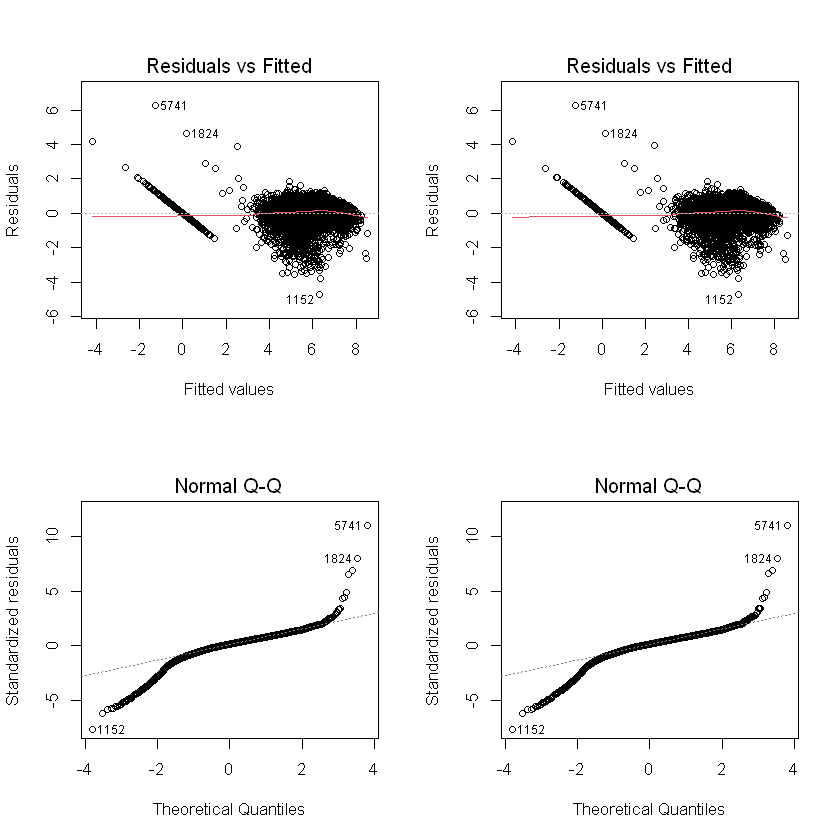

In [24]:
par(mfcol=c(2,2))
plot(model1, which = 1)
plot(model1, which = 2)
plot(model2, which = 1)
plot(model2, which = 2)

#### Residuals seem to be normal, although for a big dataset it isnt a huge concern.

In [25]:
anova(model1,model2) # not much difference in the models

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6957,2618.481,NA,NA,NA,NA
2,6964,2631.920,-7,-13.43877,5.10075,8.524689e-06


### low p value form anova test indicates these models are statistically different.

## categories for the categorical variables

In [26]:
sapply(data[c(3,12,13,14,15,16)], unique)

$Hour
 [1] 14 5  9  17 10 8  1  20 18 7  22 3  2  4  12 0  23 16 11 21 13 19 15 6 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

$Seasons
[1] Spring Autumn Winter Summer
Levels: Autumn Spring Summer Winter

$Holiday
[1] No Holiday Holiday   
Levels: Holiday No Holiday

$Fday
[1] Yes No 
Levels: No Yes

$days
[1] Wednesday Friday    Tuesday   Monday    Saturday  Thursday  Sunday   
Levels: Monday Tuesday Wednesday Thursday Friday Saturday Sunday

$months
 [1] March     November  April     February  June      September July     
 [8] August    December  October   January   May      
12 Levels: January February March April May June July August ... December

## Earlier we observed that Temp and Dtemp are highly correlated

In [27]:
model3 = update(model2, . ~ . + Temp: DPtemp ) # using interaction term
summary(model3)


Call:
lm(formula = log(BikeCount + 1) ~ Hour + Temp + Humidity + Wind.speed + 
    Visibility + DPtemp + SR + Rainfall + Seasons + Holiday + 
    Fday + months + Temp:DPtemp, data = subset(data, select = c(-Snowfall, 
    -days)))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6361 -0.2221  0.0822  0.3460  6.3558 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.672e+00  1.619e-01  10.329  < 2e-16 ***
Hour1             -1.909e-01  5.069e-02  -3.766 0.000167 ***
Hour2             -5.016e-01  5.056e-02  -9.920  < 2e-16 ***
Hour3             -8.571e-01  5.028e-02 -17.044  < 2e-16 ***
Hour4             -1.207e+00  5.084e-02 -23.746  < 2e-16 ***
Hour5             -1.171e+00  5.057e-02 -23.164  < 2e-16 ***
Hour6             -5.289e-01  5.074e-02 -10.422  < 2e-16 ***
Hour7              8.154e-02  5.058e-02   1.612 0.107004    
Hour8              4.993e-01  5.048e-02   9.893  < 2e-16 ***
Hour9   

In [28]:
anova(model2, model3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6964,2631.920,NA,NA,NA,NA
2,6963,2589.873,1,42.04723,113.046,3.346094e-26


## the anova table small p value indicated that addinf the interaction term Temp: DPtemp was a success as both models are statistically different.

## wind speed is no longer well associated (p value 0.127942) so removing it.

In [29]:
model3 = update(model3, . ~ . - Wind.speed)
summary(model3)


Call:
lm(formula = log(BikeCount + 1) ~ Hour + Temp + Humidity + Visibility + 
    DPtemp + SR + Rainfall + Seasons + Holiday + Fday + months + 
    Temp:DPtemp, data = subset(data, select = c(-Snowfall, -days)))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6417 -0.2189  0.0820  0.3473  6.3567 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.659e+00  1.617e-01  10.263  < 2e-16 ***
Hour1             -1.893e-01  5.068e-02  -3.735 0.000189 ***
Hour2             -4.984e-01  5.052e-02  -9.864  < 2e-16 ***
Hour3             -8.532e-01  5.022e-02 -16.987  < 2e-16 ***
Hour4             -1.204e+00  5.079e-02 -23.698  < 2e-16 ***
Hour5             -1.167e+00  5.049e-02 -23.112  < 2e-16 ***
Hour6             -5.246e-01  5.067e-02 -10.353  < 2e-16 ***
Hour7              8.579e-02  5.051e-02   1.699 0.089458 .  
Hour8              5.031e-01  5.042e-02   9.977  < 2e-16 ***
Hour9              4.549e-

## Doing some more testing

In [30]:

summary(update(model3, . ~ . - Rainfall + log(Rainfall+1)- SR + log(SR+1)))


Call:
lm(formula = log(BikeCount + 1) ~ Hour + Temp + Humidity + Visibility + 
    DPtemp + Seasons + Holiday + Fday + months + log(Rainfall + 
    1) + log(SR + 1) + Temp:DPtemp, data = subset(data, select = c(-Snowfall, 
    -days)))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3696 -0.2156  0.0719  0.3047  4.2970 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.064e-01  1.476e-01   6.141 8.67e-10 ***
Hour1             -2.125e-01  4.595e-02  -4.624 3.83e-06 ***
Hour2             -5.215e-01  4.581e-02 -11.383  < 2e-16 ***
Hour3             -8.405e-01  4.554e-02 -18.457  < 2e-16 ***
Hour4             -1.235e+00  4.606e-02 -26.808  < 2e-16 ***
Hour5             -1.209e+00  4.579e-02 -26.395  < 2e-16 ***
Hour6             -5.561e-01  4.595e-02 -12.100  < 2e-16 ***
Hour7              3.944e-02  4.592e-02   0.859 0.390438    
Hour8              4.628e-01  4.648e-02   9.957  < 2e-16 ***
Hou

## we can see that log transformation of rainfall and solar radiation was a success as Adjusted R-squared improved quite a lot

In [31]:
model4 = update(model3, . ~ . - Rainfall + log(Rainfall+1)- SR + log(SR+1))
summary(model4)


Call:
lm(formula = log(BikeCount + 1) ~ Hour + Temp + Humidity + Visibility + 
    DPtemp + Seasons + Holiday + Fday + months + log(Rainfall + 
    1) + log(SR + 1) + Temp:DPtemp, data = subset(data, select = c(-Snowfall, 
    -days)))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3696 -0.2156  0.0719  0.3047  4.2970 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        9.064e-01  1.476e-01   6.141 8.67e-10 ***
Hour1             -2.125e-01  4.595e-02  -4.624 3.83e-06 ***
Hour2             -5.215e-01  4.581e-02 -11.383  < 2e-16 ***
Hour3             -8.405e-01  4.554e-02 -18.457  < 2e-16 ***
Hour4             -1.235e+00  4.606e-02 -26.808  < 2e-16 ***
Hour5             -1.209e+00  4.579e-02 -26.395  < 2e-16 ***
Hour6             -5.561e-01  4.595e-02 -12.100  < 2e-16 ***
Hour7              3.944e-02  4.592e-02   0.859 0.390438    
Hour8              4.628e-01  4.648e-02   9.957  < 2e-16 ***
Hou

In [32]:
# removing temp
model4 = update(model4, . ~ . - Temp)
summary(model4)



Call:
lm(formula = log(BikeCount + 1) ~ Hour + Humidity + Visibility + 
    DPtemp + Seasons + Holiday + Fday + months + log(Rainfall + 
    1) + log(SR + 1) + Temp:DPtemp, data = subset(data, select = c(-Snowfall, 
    -days)))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3838 -0.2162  0.0715  0.3062  4.2969 

Coefficients: (3 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.700e-01  7.951e-02   8.427  < 2e-16 ***
Hour1             -2.123e-01  4.596e-02  -4.618 3.94e-06 ***
Hour2             -5.206e-01  4.582e-02 -11.362  < 2e-16 ***
Hour3             -8.388e-01  4.554e-02 -18.419  < 2e-16 ***
Hour4             -1.233e+00  4.605e-02 -26.766  < 2e-16 ***
Hour5             -1.206e+00  4.578e-02 -26.347  < 2e-16 ***
Hour6             -5.545e-01  4.596e-02 -12.066  < 2e-16 ***
Hour7              4.345e-02  4.588e-02   0.947  0.34375    
Hour8              4.683e-01  4.640e-02  10.094  < 2e-16 ***
Hour9     

## obtain 95% confidence intervals for the coefficients.

Warning message in plot.window(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"
Warning message in box(...):
""id.method" is not a graphical parameter"
Warning message in title(...):
""id.method" is not a graphical parameter"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
1152,-7.986788,0.006385397,0.009448182
5741,7.062325,0.030183924,0.035848939
6007,7.913474,0.027799517,0.041278293


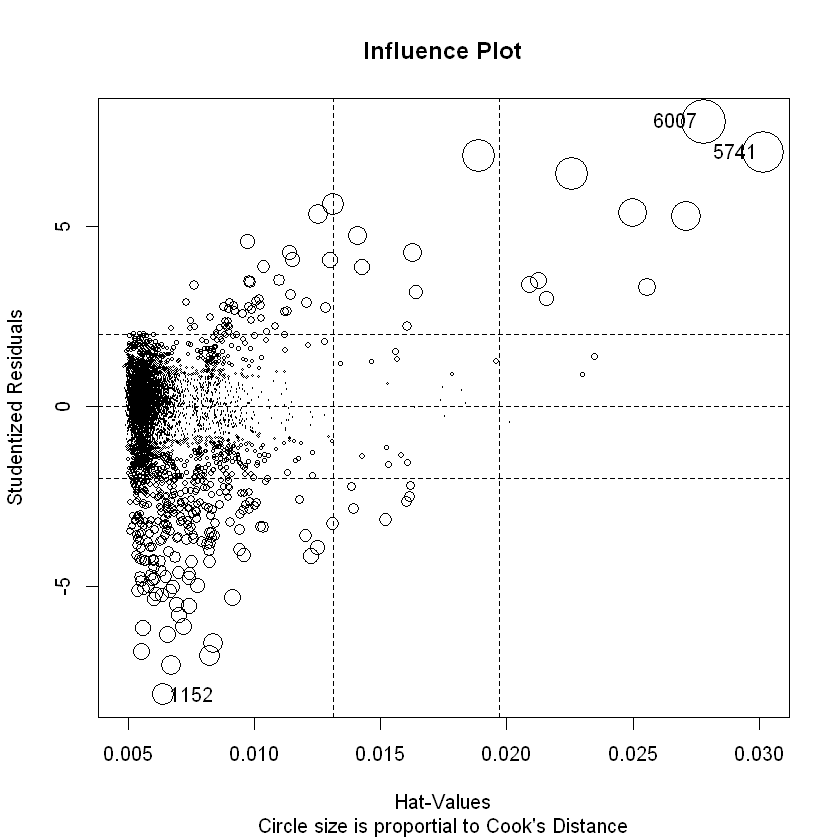

In [33]:
influencePlot(model4, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

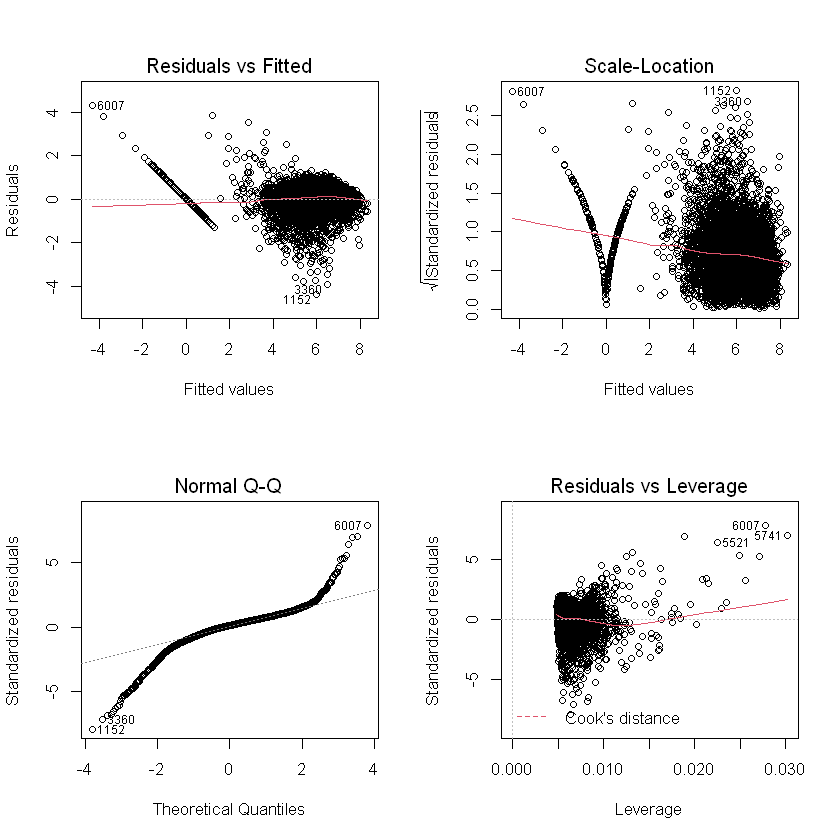

In [34]:
par(mfcol=c(2,2))
plot(model4)

In [35]:
test = read.csv("test.csv") # reading testing data

# changing Hour, Seasons, Holiday, Functioning.Day to factor as they are categorical variables

test$Seasons <- as.factor(test$Seasons) 
test$Holiday <- as.factor(test$Holiday) 
test$Functioning.Day <- as.factor(test$Functioning.Day) 
test$Hour <- as.factor(test$Hour) 

# changing a few names

# Rented.Bike.Count = BikeCount
# Temperature = Temp
# Dew.point.temperature = DPtemp
# Solar.Radiation = SR
# Functioning.Day = Fday



names(test)[c(2,4,8,9,14)]<-c("BikeCount","Temp","DPtemp", "SR","Fday")

## Day of the Week
test$Date = substr(test$Date,1,10)
days<-weekdays(as.Date(test$Date))
test$days=days
test$days <- factor(test$days, levels=c("Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"))

## Converting date to a date format in R
test$Date <- as.POSIXct(test$Date)
## Extracting Month Name
test$months <- format(test$Date,"%B")
test$months <- factor(test$months, levels=c("January","February", "March",
                                            "April", "May", "June","July", "August",
                                            "September", "October", "November", "December"))

### MLR prediction and outputting prediction values into new column in the test data

In [36]:
# predicting the test dataset BikeCount using the Multiple linear regression model
prediction_1=predict(model4,test)
test$logBikeCount=prediction_1

# transforming the log predictions back to real numbers for model efficiency testing purpose
test$predicted_BikeCount_MLR=round(exp(test$logBikeCount),digits=0)-1

head(test)

Warning message in predict.lm(model4, test):
"prediction from a rank-deficient fit may be misleading"


,Date,BikeCount,Hour,Temp,Humidity,Wind.speed,Visibility,DPtemp,SR,Rainfall,Snowfall,Seasons,Holiday,Fday,days,months,logBikeCount,predicted_BikeCount_MLR
,<dttm>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,0001-12-20,360,11,-0.5,21,1.3,1936,-20.2,0.94,0,0,Winter,No Holiday,Yes,Thursday,December,5.576750,263
2,0001-12-20,862,18,0.6,66,1.4,2000,-5.0,0.00,0,0,Winter,No Holiday,Yes,Thursday,December,6.200621,492
3,0001-12-20,323,23,-1.3,84,1.0,1265,-3.6,0.00,0,0,Winter,No Holiday,Yes,Thursday,December,5.289074,197
4,0002-12-20,89,4,-3.8,79,2.0,1167,-6.9,0.00,0,0,Winter,No Holiday,Yes,Friday,December,3.913004,49
5,0002-12-20,219,8,-4.2,79,2.1,1436,-7.3,0.01,0,0,Winter,No Holiday,Yes,Friday,December,5.617196,274
6,0002-12-20,479,12,4.3,41,1.3,1666,-7.8,1.09,0,0,Winter,No Holiday,Yes,Friday,December,5.892200,361


##  MAE 
#### is measured by taking the average of the absolute difference between actual values and the predictions.

## The Root Mean Square Error 
#### is measured by taking the square root of the average of the squared difference between the prediction and the actual value. It represents the sample standard deviation of the differences between predicted values and observed values.

## RSQ (R^2) 
#### helps you to understand how well the independent variable adjusted with the variance in your model. That means how good is the model for a dataset.

In [37]:
#testing using yardstick package, function metrics

metrics(test,BikeCount,predicted_BikeCount_MLR)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,322.9604850
rsq,standard,0.7546977
mae,standard,204.3744292


## FOR MLR MODEL

### According to this analysis, root mean squared error is 322.9604850, mean absolute error is 204.3744292 and r squared is 0.7546 which are decent results for a MLR implementation.

# Random Forest Model

## Random forest (or random forests) is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees.


In [38]:
set.seed(999)






# here im taking log(BikeCount+1) to log transform the count as the response variable BikeCount has natural outliers.
# number of trees selected is 100, should be suitable for this dataset.
forest <- randomForest(log(BikeCount+1) ~.,data,importance=TRUE, ntree=100)

forest


Call:
 randomForest(formula = log(BikeCount + 1) ~ ., data = data, importance = TRUE,      ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1721212
                    % Var explained: 93.17

### %explained variance is a measure of how well out-of-bag predictions explain the target variance of the data. the RF model is able to explain 93.17 percent of the data.

## Prediction for the RF model

In [39]:
# predicting the test dataset BikeCount using the random forest algorithm model
prediction_2=predict(forest,test)
test$logBikeCount_1=prediction_2

# transforming the log predictions back to real numbers for model efficiency testing purpose
test$predicted_BikeCount_RF=round(exp(test$logBikeCount_1),digits=0)-1

head(test)

,Date,BikeCount,Hour,Temp,Humidity,Wind.speed,Visibility,DPtemp,SR,Rainfall,Snowfall,Seasons,Holiday,Fday,days,months,logBikeCount,predicted_BikeCount_MLR,logBikeCount_1,predicted_BikeCount_RF
,<dttm>,<int>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0001-12-20,360,11,-0.5,21,1.3,1936,-20.2,0.94,0,0,Winter,No Holiday,Yes,Thursday,December,5.576750,263,5.773632,321
2,0001-12-20,862,18,0.6,66,1.4,2000,-5.0,0.00,0,0,Winter,No Holiday,Yes,Thursday,December,6.200621,492,6.286424,536
3,0001-12-20,323,23,-1.3,84,1.0,1265,-3.6,0.00,0,0,Winter,No Holiday,Yes,Thursday,December,5.289074,197,5.584178,265
4,0002-12-20,89,4,-3.8,79,2.0,1167,-6.9,0.00,0,0,Winter,No Holiday,Yes,Friday,December,3.913004,49,4.230818,68
5,0002-12-20,219,8,-4.2,79,2.1,1436,-7.3,0.01,0,0,Winter,No Holiday,Yes,Friday,December,5.617196,274,5.987297,397
6,0002-12-20,479,12,4.3,41,1.3,1666,-7.8,1.09,0,0,Winter,No Holiday,Yes,Friday,December,5.892200,361,6.031802,415


## Highlighting the important attributes RF

,%IncMSE,IncNodePurity
Date,6.432388,321.53309
Hour,54.832619,2246.05681
Temp,17.933625,1608.70734
Humidity,25.999434,982.71372
Wind.speed,7.668017,171.01877
Visibility,12.950831,279.32608
DPtemp,11.470674,360.60141
SR,12.345406,325.91259
Rainfall,29.380764,1129.70137
Snowfall,8.239366,38.76382


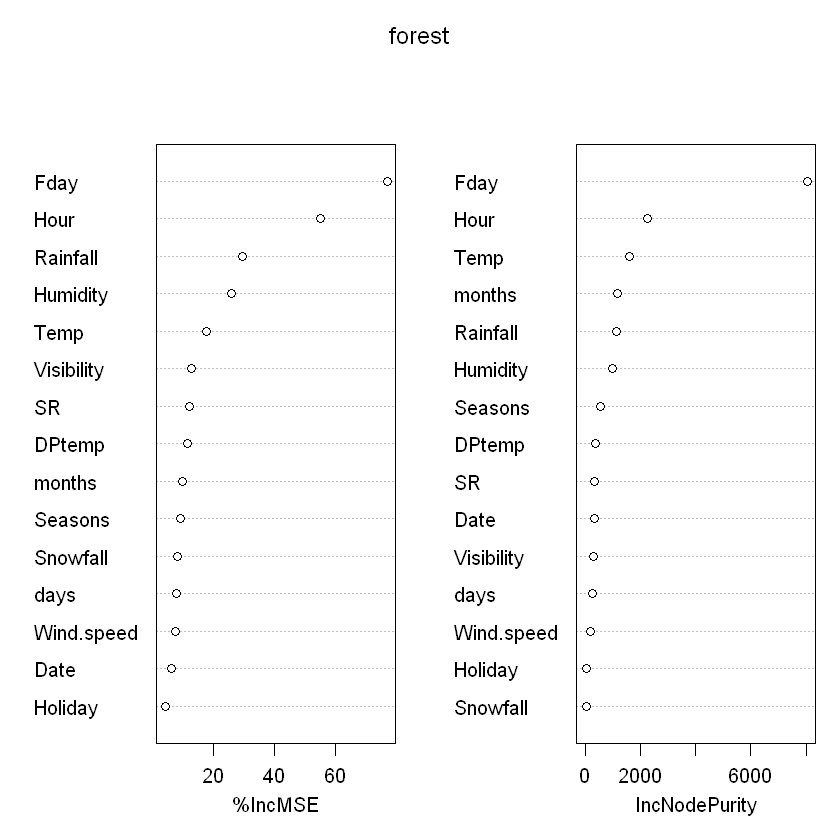

In [40]:
#highlighting the important attributes

importance(forest)        
varImpPlot(forest)   

## Inference

    1.Fday is most important as it direcly influences if bikes can be rented or not. if its non functioning day, then bike rented would be zero.
    2. Hour of the day is also hugely influencial. this is easy to explain as demands are higher at 8-18 hours as opposed to 0-6 for the day.
    3. Rainfall affects whether people are able to ride bikes; if its raining, people are unlikely to rent bikes.
    4. The heirarchy of important variables just makes sense.


In [41]:
#testing using yardstick package, function metrics

metrics(test,BikeCount,predicted_BikeCount_RF)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,230.6900929
rsq,standard,0.8830867
mae,standard,132.9063927


## FOR RANDOM FOREST MODEL

## According to this analysis, root mean squared error is 230.6900929, mean absolute error is 132.9063927 and r squared is 0.8830867

### From the above testing it is pretty safe to say that the random forest model is able to predict the rental BikeCounts more accurately than the MLR model.




### Some reasons for Random forest model outperforming MLR model for prediction task

    1.Decision trees such as random forest (second model used in this assignment) are able to handle messy data and relationships way better than regression models in general. In our case, there are many variables with complex relationships which allows the random forest model to shine.
    2. Linear regression models require regularization to overcome overfitting whereas random forests have regularization inbuilt.
    3. Random forest is a sum of piecewise function ( is a function defined by multiple sub-functions, where each sub-function applies to a different sub-domain).
    4. Random forest runs efficiently on large datasets.
    5. RF is able to handle thousands of variables if required, and is not required to delete attributes unlike MLR.
    6. Missing data estimation in RF is a strong feature, wherese in MLR it needs to be done manually.
    7. RF also provides robust variable interaction detection methodology which needs to be dsone manually in MLR (by traial and error and human intuition).
    8. Overall RFs are just more suitable for the prediction task for this assignment for the reasons stated above. If the data was less complex and variabled had straighforward linear relationships, MLR would be a decent option.